<a href="https://colab.research.google.com/github/Fat-AK/TeachingTensorflow2022/blob/main/Deep_Learning_with_Python%2C_mnist_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels) 

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),  #  model consists of a sequence of two Dense layers, which are densely connected (also called fully connected) neural layers.
    layers.Dense(10, activation="softmax") #  The second (and last) layer is a 10-way softmax classification layer, which means it will return an array of 10 probability scores (summing to 1)
])

 An optimizer—The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance. 
 
   A loss function—How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.

 Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Before training, we’ll preprocess the data by reshaping it into the shape the model expects and scaling it so that all values are in the [0, 1] interval. Previously, our training images were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We’ll transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 8ms/step - loss: 0.2567 - accuracy: 0.9253
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1046 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0685 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0499 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0368 - accuracy: 0.9889


Two quantities are displayed during training: the loss of the model over the training data, and the accuracy of the model over the training data. We quickly reach an accuracy of 0.989 (98.9%) on the training data.



Now that we have a trained model, we can use it to predict class probabilities for new digits—images that weren’t part of the training data, like those from the test set.

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 69ms/step


array([1.7419350e-09, 3.5505002e-12, 1.2811556e-06, 5.2380351e-06,
       1.9315142e-13, 5.0099387e-09, 1.4714426e-14, 9.9999326e-01,
       2.0756183e-09, 9.8492954e-08], dtype=float32)

Each number of index i in that array corresponds to the probability that digit image test_digits[0] belongs to class i.


This first test digit has the highest probability score (0.99999106, almost 1) at index 7, so according to our model, it must be a 7:

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.99999326

In [ ]:
test_labels[0]

7

 computing average accuracy over the entire test set

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0795 - accuracy: 0.9776
test_acc: 0.9775999784469604


The test-set accuracy turns out to be 97.8%—that’s quite a bit lower than the training-set accuracy (98.9%). This gap between training accuracy and test accuracy is an example of overfitting: the fact that machine learning models tend to perform worse on new data than on their training data.

# **Data representations for neural networks**

At its core, a tensor is a container for data—usually numerical data.A tensor that contains only one number is called a scalar (or scalar tensor, or rank-0 tensor, or 0D tensor). In NumPy, a float32 or float64 number is a scalar tensor (or scalar array). You can display the number of axes of a NumPy tensor via the ndim attribute; a scalar tensor has 0 axes (ndim == 0). The number of axes of a tensor is also called its rank. Here’s a NumPy scalar:




In [ ]:
import numpy as np
x = np.array(12)
x   # array(12)
x.ndim  # 0

An array of numbers is called a vector, or rank-1 tensor, or 1D tensor. A rank-1 tensor is said to have exactly one axis. Following is a NumPy vector:

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x
#array([12, 3, 6, 14, 7])
x.ndim 
#1

An array of vectors is a matrix, or rank-2 tensor, or 2D tensor. A matrix has two axes (often referred to as rows and columns). You can visually interpret a matrix as a rectangular grid of numbers. This is a NumPy matrix:

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]])
x.ndim 
#2

If you pack such matrices in a new array, you obtain a rank-3 tensor (or 3D tensor), which you can visually interpret as a cube of numbers. Following is a NumPy rank-3 tensor:

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]]])
x.ndim
#3

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')



  Let’s display the fourth digit in this rank-3 tensor

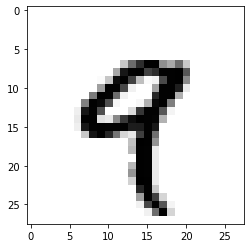

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9



  The following example selects digits #10 to #100 (#100 isn’t included) and puts them in an array of shape (90, 28, 28):

In [ ]:
my_slice = train_images[10:100]
my_slice.shape
#(90, 28, 28)

my_slice = train_images[10:100, :, :]          
my_slice.shape
#(90, 28, 28)

my_slice = train_images[10:100, 0:28, 0:28]   
my_slice.shape
#(90, 28, 28)

# For instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you would do this:


my_slice = train_images[:, 14:, 14:]

#  In order to crop the images to patches of 14 × 14 pixels centered in the middle, you’d do this:
#  negative indices in Python lists indicate a position relative to the end of the current axis.
my_slice = train_images[:, 7:-7, 7:-7]

In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll come across in deep learning will be the samples axis (sometimes called the samples dimension). In the MNIST example, “samples” are images of digits.

  In addition, deep learning models don’t process an entire dataset at once; rather, they break the data into small batches. Concretely, here’s one batch of our MNIST digits, with a batch size of 128:

In [ ]:
batch = train_images[:128]
#  And here’s the next batch:
batch = train_images[:128]


n = 3 
batch = train_images[128 * n:128 * (n + 1)]



  When considering such a batch tensor, the first axis (axis 0) is called the batch axis or batch dimension. This is a term you’ll frequently encounter when using Keras and other deep learning libraries.

Let’s make data tensors more concrete with a few examples similar to what you’ll encounter later. The data you’ll manipulate will almost always fall into one of the following categories:

  
    
**Vector data**—Rank-2 tensors of shape (samples, features), where each sample is a vector of numerical attributes (“features”)
    

    
**Timeseries data** or sequence data—Rank-3 tensors of shape (samples, timesteps, features), where each sample is a sequence (of length timesteps) of feature vectors
    

    
**Images**—Rank-4 tensors of shape (samples, height, width, channels), where each sample is a 2D grid of pixels, and each pixel is represented by a vector of values (“channels”)
    

 **Video**—Rank-5 tensors of shape (samples, frames, height, width, channels), where each sample is a sequence (of length frames) of images





 Vector data

  This is one of the most common cases. In such a dataset, each single data point can be encoded as a vector, and thus a batch of data will be encoded as a rank-2 tensor (that is, an array of vectors), where the first axis is the samples axis and the second axis is the features axis.

  Let’s take a look at two examples:

  
    
An actuarial dataset of people, where we consider each person’s age, gender, and income. Each person can be characterized as a vector of 3 values, and thus an entire dataset of 100,000 people can be stored in a rank-2 tensor of shape (100000, 3).
    

    
A dataset of text documents, where we represent each document by the counts of how many times each word appears in it (out of a dictionary of 20,000 common words). Each document can be encoded as a vector of 20,000 values (one count per word in the dictionary), and thus an entire dataset of 500 documents can be stored in a tensor of shape (500, 20000).

Whenever time matters in your data (or the notion of sequence order), it makes sense to store it in a rank-3 tensor with an explicit time axis. Each sample can be encoded as a sequence of vectors (a rank-2 tensor), and thus a batch of data will be encoded as a rank-3 tensor


  The time axis is always the second axis (axis of index 1) by convention. Let’s look at a few examples:

  
    
A dataset of stock prices. Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus, every minute is encoded as a 3D vector, an entire day of trading is encoded as a matrix of shape (390, 3) (there are 390 minutes in a trading day), and 250 days’ worth of data can be stored in a rank-3 tensor of shape (250, 390, 3). Here, each sample would be one day’s worth of data.
    

    
A dataset of tweets, where we encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters. In this setting, each character can be encoded as a binary vector of size 128 (an all-zeros vector except for a 1 entry at the index corresponding to the character). Then each tweet can be encoded as a rank-2 tensor of shape (280, 128), and a dataset of 1 million tweets can be stored in a tensor of shape (1000000, 280, 128).

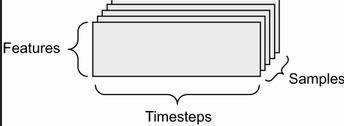

Images typically have three dimensions: height, width, and color depth. Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in rank-2 tensors, by convention image tensors are always rank-3, with a one-dimensional color channel for grayscale images. A batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3)

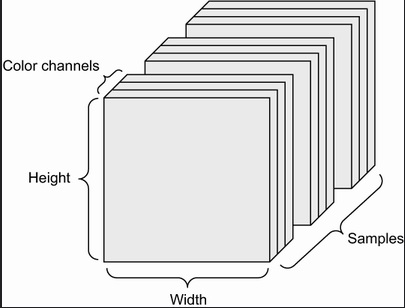




  There are two conventions for shapes of image tensors: the channels-last convention (which is standard in TensorFlow) and the channels-first convention (which is increasingly falling out of favor).

  The channels-last convention places the color-depth axis at the end: (samples, height, width, color_depth). Meanwhile, the channels-first convention places the color depth axis right after the batch axis: (samples, color_depth, height, width). With the channels-first convention, the previous examples would become (128, 1, 256, 256) and (128, 3, 256, 256). The Keras API provides support for both formats.





  Video data is one of the few types of real-world data for which you’ll need rank-5 tensors. A video can be understood as a sequence of frames, each frame being a color image. Because each frame can be stored in a rank-3 tensor (height, width, color_ depth), a sequence of frames can be stored in a rank-4 tensor (frames, height, width, color_depth), and thus a batch of different videos can be stored in a rank-5 tensor of shape (samples, frames, height, width, color_depth).

  For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per second would have 240 frames. A batch of four such video clips would be stored in a tensor of shape (4, 240, 144, 256, 3). That’s a total of 106,168,320 values! If the dtype of the tensor was float32, each value would be stored in 32 bits, so the tensor would represent 405 MB. Heavy! Videos you encounter in real life are much lighter, because they aren’t stored in float32, and they’re typically compressed by a large factor (such as in the MPEG format).





  In our initial example, we built our model by stacking Dense layers on top of each other. A Keras layer instance looks like this:

In [ ]:
keras.layers.Dense(512, activation="relu")



  This layer can be interpreted as a function, which takes as input a matrix and returns another matrix—a new representation for the input tensor. Specifically, the function is as follows (where W is a matrix and b is a vector, both attributes of the layer):

  output = relu (dot(input, W) + b)
  

  Let’s unpack this. We have three tensor operations here:

  
    
      A dot product (dot) between the input tensor and a tensor named W
    

    
      An addition (+) between the resulting matrix and a vector b
    

    
      A relu operation: relu(x) is max(x, 0); “relu” stands for “rectified linear unit”



  The relu operation and addition are element-wise operations: operations that are applied independently to each entry in the tensors being considered. This means these operations are highly amenable to massively parallel implementations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2     
    x = x.copy()                 
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2       
    assert x.shape == y.shape
    x = x.copy()                   
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import time
  
x = np.random.random((20, 100))
y = np.random.random((20, 100))
  
t0 = time.time() 
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.) 
print("Took: {0:.2f} s".format(time.time() - t0))

# Broadcasting

 the smaller tensor will be broadcast to match the shape of the larger tensor. Broadcasting consists of two steps:

  
    
Axes (called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.
    

    
The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

In [ ]:
import numpy as np
X = np.random.random((32, 10))     
y = np.random.random((10,))

#   First, we add an empty first axis to y, whose shape becomes (1, 10):
y = np.expand_dims(y, axis=0)

#  Then, we repeat y 32 times alongside this new axis, so that we end up with a tensor Y with shape (32, 10), where Y[i, :] == y for i in range(0, 32):

Y = np.concatenate([y] * 32, axis=0) 

X.shape
# (32, 10)
Y.shape
# (32, 10)

#  At this point, we can proceed to add X and Y, because they have the same shape.



  In terms of implementation, no new rank-2 tensor is created, because that would be terribly inefficient. The repetition operation is entirely virtual: it happens at the algorithmic level rather than at the memory level.

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2               
    assert len(y.shape) == 1              
    assert x.shape[1] == y.shape[0]
    x = x.copy()                           
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x